
# Análisis de Datos de Calificaciones y Tiempo de Estudio

Este notebook presenta un análisis exploratorio de datos y una regresión lineal aplicada a un conjunto de datos de calificaciones y horas dedicadas al estudio por estudiantes. El objetivo es explorar la relación entre el tiempo de estudio y el rendimiento académico.


In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [25]:

file_path = '../data/raw/datos.csv'
data = pd.read_csv(file_path)
data.head()


,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,NaN
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,NaN
4,Juan González,Díaz,125,70.0



## Análisis Exploratorio de Datos

Calculamos estadísticas descriptivas básicas para entender la distribución de las horas dedicadas al estudio y las calificaciones obtenidas.


In [26]:
from IPython.display import display, Markdown

# Definimos una función para mostrar las estadísticas descriptivas de manera más visual
def display_descriptive_stats(dataframe, column_name):
    stats = dataframe[column_name].describe()
    stats_df = pd.DataFrame(stats)
    stats_df.columns = [f"Estadísticas de {column_name}"]
    return stats_df

# Mostramos las estadísticas descriptivas para 'horas_dedicadas'
display(Markdown("### Estadísticas Descriptivas de Horas Dedicadas"))
display(display_descriptive_stats(data, 'horas_dedicadas'))

# Mostramos las estadísticas descriptivas para 'calificaciones_obtenida', excluyendo NaN
display(Markdown("### Estadísticas Descriptivas de Calificaciones Obtenidas"))
display(display_descriptive_stats(data_limpia, 'calificaciones_obtenida'))


### Estadísticas Descriptivas de Horas Dedicadas

,Estadísticas de horas_dedicadas
count,20.000000
mean,99.400000
std,58.129076
min,2.000000
25%,50.000000
50%,98.500000
75%,154.500000
max,178.000000


### Estadísticas Descriptivas de Calificaciones Obtenidas

,Estadísticas de calificaciones_obtenida
count,18.000000
mean,64.055556
std,33.539217
min,0.000000
25%,41.250000
50%,70.000000
75%,97.250000
max,100.000000



## Regresión Lineal

Realizamos una regresión lineal para analizar la relación entre las horas dedicadas al estudio y las calificaciones obtenidas.


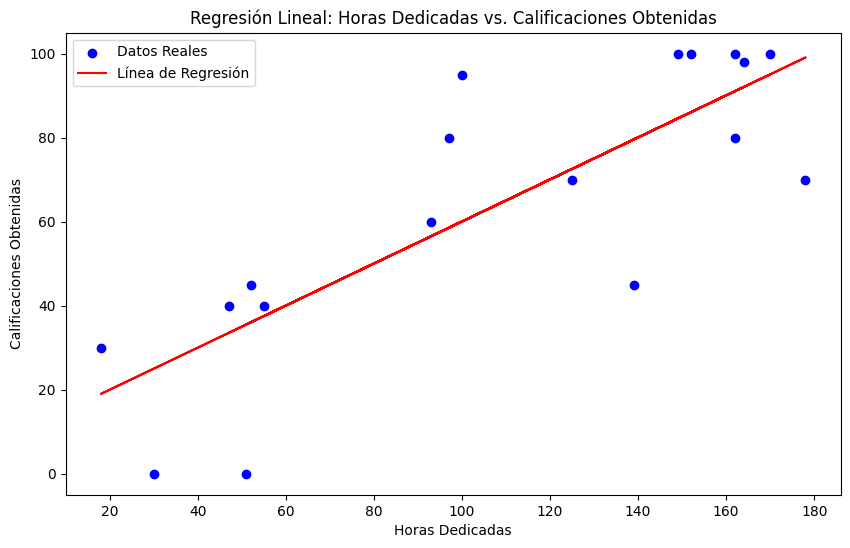

(365.1070918886464, 0.6563328585151595)

In [27]:

X = data_limpia[['horas_dedicadas']]
y = data_limpia['calificaciones_obtenida']
modelo = LinearRegression()
modelo.fit(X, y)
predicciones = modelo.predict(X)
mse = mean_squared_error(y, predicciones)
r2 = r2_score(y, predicciones)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.plot(X, predicciones, color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Horas Dedicadas vs. Calificaciones Obtenidas')
plt.xlabel('Horas Dedicadas')
plt.ylabel('Calificaciones Obtenidas')
plt.legend()
plt.show()

(mse, r2)


El análisis de regresión lineal muestra que hay una relación positiva entre el número de horas dedicadas y las calificaciones obtenidas. La línea de regresión, representada en el gráfico, ilustra cómo se espera que aumenten las calificaciones a medida que se incrementa el número de horas dedicadas al estudio..

## Predicción de Calificación Basada en Horas Dedicadas

Utilizando el modelo de regresión lineal desarrollado previamente, podemos predecir la calificación esperada para un número específico de horas dedicadas al estudio. Este análisis nos permite entender el impacto estimado del tiempo de estudio en el rendimiento académico.

Consideraremos un caso hipotético en el que queremos predecir la calificación de un estudiante que ha dedicado un número de horas igual a la suma de los dígitos de su número de cuenta módulo 50.


In [28]:
# Suponiendo que 'n_horas' es la suma de los dígitos del número de cuenta módulo 50
# Aquí se utiliza un valor hipotético para 'n_horas'.
n_horas = 120

# Realizando la predicción utilizando el modelo de regresión lineal
calificacion_predicha = modelo.predict([[n_horas]])

print(f"La calificación predicha para un estudiante que dedicó {n_horas} horas es: {calificacion_predicha[0]:.2f}")


La calificación predicha para un estudiante que dedicó 120 horas es: 70.06


/home/shaman/.cache/pypoetry/virtualenvs/machine-learning-3DbA06_O-py3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Evaluación de la Bondad de Ajuste del Modelo

Para determinar la efectividad de nuestro modelo de regresión lineal en explicar las calificaciones obtenidas, evaluaremos la bondad de ajuste utilizando el coeficiente de determinación, conocido como \(R^2\). Este coeficiente cuantifica la proporción de la variabilidad en la variable dependiente que es predecible a partir de la variable independiente.


In [29]:
from sklearn.metrics import r2_score


# Calculando el coeficiente de determinación R^2 para el modelo
y_real = datos_limpios['calificaciones_obtenida']
X_real = datos_limpios[['horas_dedicadas']]
y_predicha = modelo.predict(X_real)

r2 = r2_score(y_real, y_predicha)

print(f"El coeficiente de determinación (R^2) del modelo es: {r2:.4f}")


NameError: name 'datos_limpios' is not defined


## Conclusión

Este análisis proporciona una visión sobre cómo el tiempo dedicado al estudio puede influir en las calificaciones obtenidas. El modelo de regresión lineal indica que hay una relación moderada entre el número de horas dedicadas y el rendimiento académico. Futuras investigaciones podrían explorar la influencia de variables adicionales en el rendimiento académico.
